# Business Understanding

## Project Domain

Proyek ini berada dalam domain keuangan (financial forecasting), khususnya pada area prediksi harga komoditas. Fokus utama adalah harga emas, yang merupakan salah satu aset paling stabil dan berharga di dunia. Perubahan harga emas sangat memengaruhi keputusan investasi, kebijakan moneter, dan strategi lindung nilai.

##Problem Statements



*   Harga emas sangat dipengaruhi oleh banyak faktor seperti permintaan pasar, fluktuasi mata uang, dan kondisi geopolitik. Namun, prediksi harga emas secara akurat sulit dilakukan secara manual karena kompleksitas dan volatilitasnya.
*   Perusahaan, investor, dan analis pasar membutuhkan sistem cerdas untuk memprediksi harga emas dalam jangka pendek maupun menengah, sehingga dapat mengambil keputusan yang lebih tepat waktu dan menguntungkan.



## Goals



*   Membangun model deep learning (LSTM) yang mampu memprediksi harga penutupan emas secara akurat berdasarkan data historis seperti Open, High, Low, dan Volume.
*   Melakukan forecasting harga emas 60 hari ke depan, sehingga dapat memberikan wawasan yang bermanfaat untuk perencanaan investasi dan manajemen risiko.






## Solution Statements



*   Menggunakan algoritma Long Short-Term Memory (LSTM), yang merupakan bagian dari Recurrent Neural Network (RNN), sangat cocok untuk memproses data time series seperti harga emas.
*   Membuat aplikasi Streamlit yang dapat digunakan untuk memasukan data baru dan mendapatkan prediksi harga emas dan melihat hasil forecast harga emas selama 60 hari mendatang secara visual






# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrizkyferdiansyah","key":"8d27c6d4bf1c7e2e2d0882cbc2b6470f"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d sid321axn/gold-price-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/sid321axn/gold-price-prediction-dataset
License(s): CC0-1.0
  0% 0.00/371k [00:00<?, ?B/s]
100% 371k/371k [00:00<00:00, 692MB/s]


In [4]:
!mkdir gold-price-prediction-dataset
!unzip gold-price-prediction-dataset.zip -d gold-price-prediction-dataset
!ls gold-price-prediction-dataset

Archive:  gold-price-prediction-dataset.zip
  inflating: gold-price-prediction-dataset/FINAL_USO.csv  
FINAL_USO.csv


## Import Library yang dibutuhkan

In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('gold-price-prediction-dataset/FINAL_USO.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 1000x600 with 0 Axes>

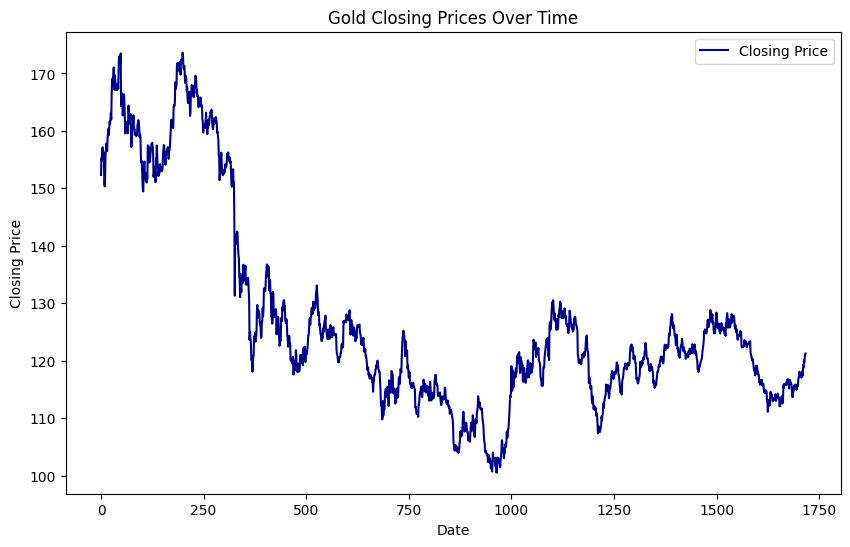

In [9]:
print(plt.style.available)

plt.style.use('seaborn-v0_8-dark-palette')
plt.figure(figsize=(10, 6))

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Closing Price', color='darkblue')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

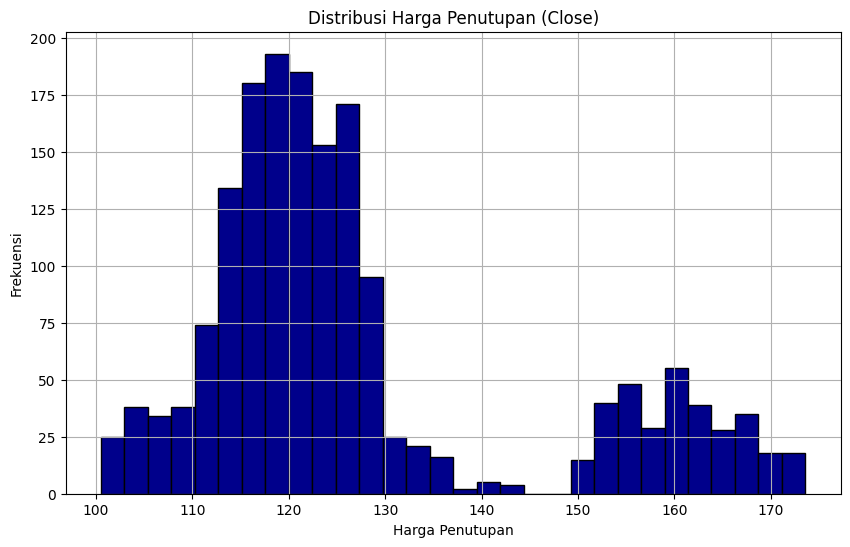

In [10]:
plt.figure(figsize=(10, 6))
df['Close'].hist(bins=30, color='darkblue', edgecolor='black')
plt.title('Distribusi Harga Penutupan (Close)')
plt.xlabel('Harga Penutupan')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

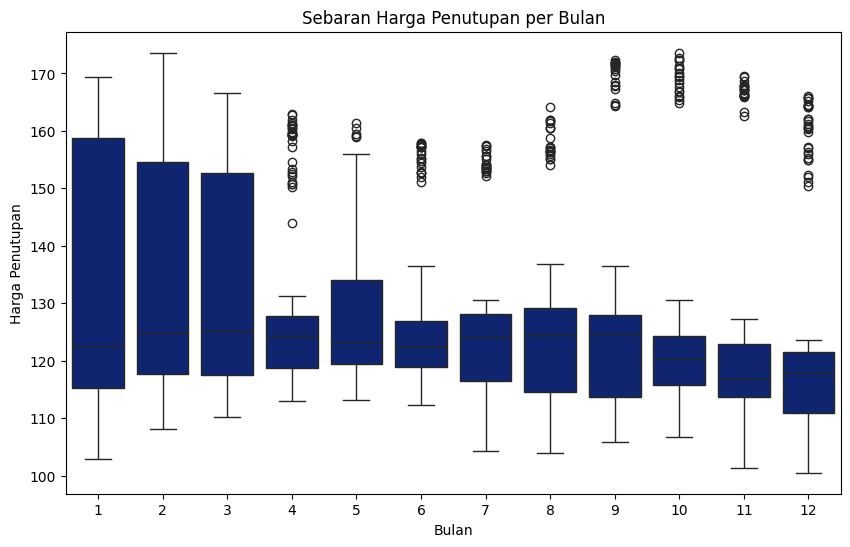

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Close', data=df,)
plt.title('Sebaran Harga Penutupan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Harga Penutupan')
plt.show()

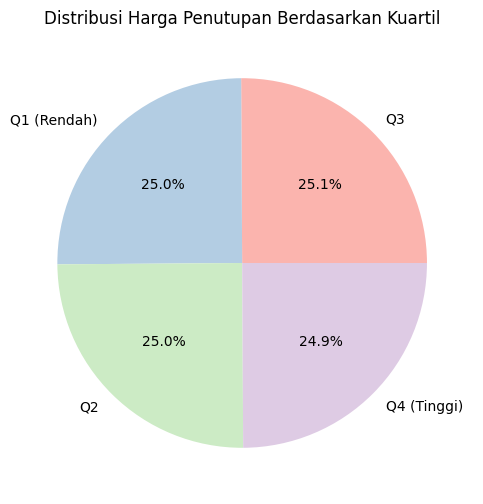

In [12]:
# Buat kategori kuartil berdasarkan harga penutupan
df['Close_Quartile'] = pd.qcut(df['Close'], q=4, labels=['Q1 (Rendah)', 'Q2', 'Q3', 'Q4 (Tinggi)'])

# Hitung jumlah data per kuartil
quartile_counts = df['Close_Quartile'].value_counts()

# Pie chart
plt.figure(figsize=(10, 6))
plt.pie(quartile_counts, labels=quartile_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1.colors)
plt.title('Distribusi Harga Penutupan Berdasarkan Kuartil')
plt.show()

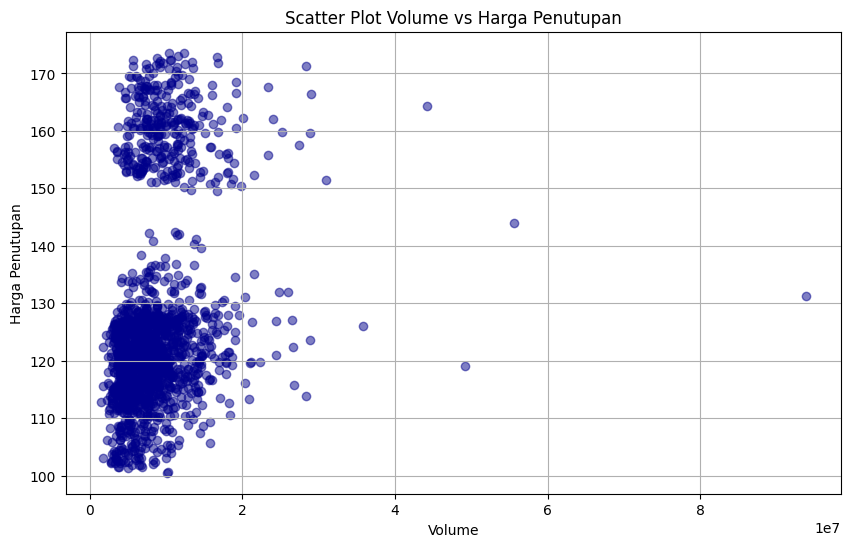

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='darkblue')
plt.title('Scatter Plot Volume vs Harga Penutupan')
plt.xlabel('Volume')
plt.ylabel('Harga Penutupan')
plt.grid(True)
plt.show()

# Data Preparation

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [15]:
selected_features = [
    'Year', 'Month', 'Adj Close', 'High', 'Low', 'Open',
    'GDX_Low', 'GDX_Close', 'GDX_High', 'GDX_Adj Close', 'GDX_Open',
    'SF_Price'
]

In [16]:
df = df.dropna(subset=selected_features + ['Close'])
X = df[selected_features]
y = df['Close']

In [17]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [19]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Modeling

In [23]:
model = Sequential([
    layers.LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    layers.LSTM(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="linear")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test),
    verbose=1
)

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 16336.1426 - mae: 126.6358 - val_loss: 8851.9609 - val_mae: 93.5307
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3393.1865 - mae: 48.3826 - val_loss: 717.5435 - val_mae: 23.0483
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 528.3046 - mae: 19.1465 - val_loss: 304.5479 - val_mae: 15.1470
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 269.0257 - mae: 13.7532 - val_loss: 210.2999 - val_mae: 12.3128
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 188.0310 - mae: 11.4521 - val_loss: 186.0469 - val_mae: 11.3620
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 138.6578 - mae: 9.5943 - val_loss: 141.8620 - val_mae: 10.0963
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 115.6292 - mae: 8.8805 - val_loss: 116.6544 - val_mae: 8.9049
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 93.9102 - mae: 7.9907 - val_loss: 88.1881 - val_mae: 7.7270
Epoch 9/50
43/43 ━

# Evaluation

In [27]:
y_pred = model.predict(X_test_lstm).ravel()

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [28]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2%}")

Mean Absolute Error (MAE): 1.33
Mean Squared Error (MSE): 2.63
R² Score: 99.16%


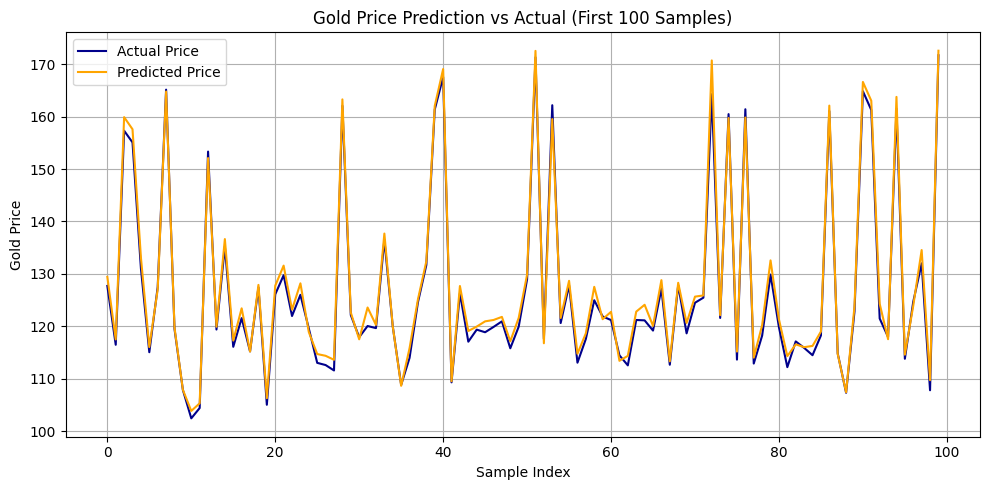

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual Price', color='darkblue')
plt.plot(y_pred[:100], label='Predicted Price', color='orange')
plt.title('Gold Price Prediction vs Actual (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Gold Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

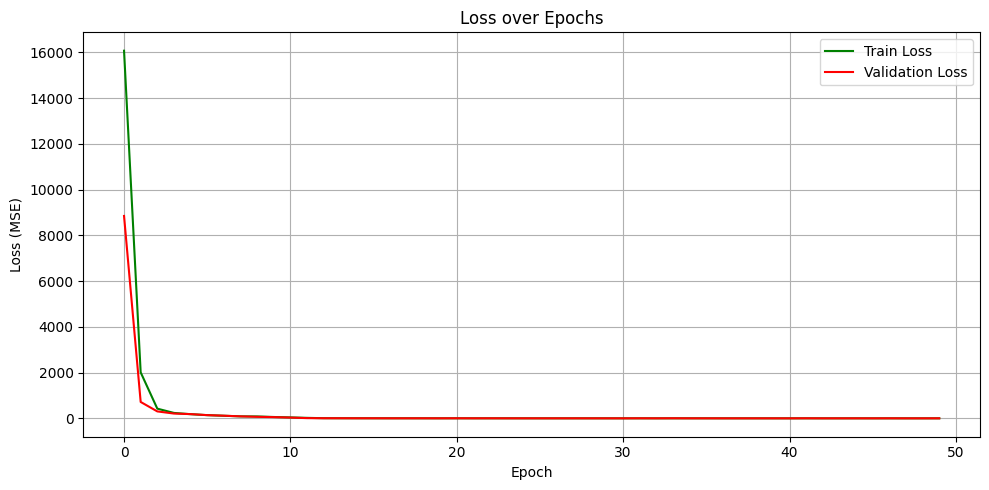

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Deployment

## Model Simulation

In [31]:
new_data = np.array([[2025, 6, 1950.0, 1965.0, 1940.0, 1955.0, 32.5, 33.1, 33.5, 33.0, 32.9, 1952.4]])
new_data_scaled = scaler.transform(new_data)
new_data_lstm = new_data_scaled.reshape((1, new_data_scaled.shape[1], 1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [32]:
predicted_price = model.predict(new_data_lstm)
print(f"Prediksi Harga Emas: {predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediksi Harga Emas: 10113.10


## Save Model

In [33]:
model.save('gold_price.h5')

In [34]:
model = tf.keras.models.load_model('gold_price.h5')

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_enable_resource_variables = True
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS
]
converter._experimental_lower_tensor_list_ops = False


tflite_model = converter.convert()

with open('gold_price.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp_whg844f'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 12, 1), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  133153608358352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153608363344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153608362576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153608363728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153608355664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153608360080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153608363536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153608362768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153583874896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133153583874512: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [35]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']